## This notebook serves for creating simple plots from generated data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
# load data from csv and concat them
def loadDF(algoName, folderName, nList):  
    fileNameTemplate = './Output/{0}_{1}_{2}.csv'

    df = None
    for n in nList:
        if df is None:
            df = pd.read_csv(fileNameTemplate.format(folderName, algoName, n))
        else:
            df = pd.concat([df, pd.read_csv(fileNameTemplate.format(folderName, algoName, n))], ignore_index=True)
    
    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [3]:
# load results.csv
res = pd.read_csv('results.csv')
for index, row in res.iterrows():
    if row['FileName'][0] == 'Z':
        res.loc[index, 'n'] = row['FileName'][3:]
        res.loc[index, 'folder'] = row['FileName'][:3]
    else:
        res.loc[index, 'n'] = row['FileName'][2:]
        res.loc[index, 'folder'] = row['FileName'][:2]

display(res.head(1))
display(res.tail(1))

,FileName,AlgoName,CpuTime,Date,n,folder
0,NK27,BruteForce,1372.25,2020-10-25,27,NK


,FileName,AlgoName,CpuTime,Date,n,folder
241,ZKW25,FPTAS_E0.2,0.0625,2020-10-31,25,ZKW


In [4]:
# definice pouzitelnych promennych
NK = 'NK'
ZKC = 'ZKC'
ZKW = 'ZKW'
bruteForce = 'BruteForce'
bnb = 'BranchAndBound'
greedy = 'Greedy'
greedyRedux = 'GreedyRedux'
dp = 'DP_PD'
epsilon = 0.01 # or 0.05, 0.1, 0.2
fptas = 'FPTAS_E' + str(epsilon)

In [5]:
# ziskani pozadovanych dat
# + lze omezit/rozsirit nacitane nka
# vyber zpracovavanou slozku
nList = [4,10,15,20,22,25,27,30]#,32]#,35,37,40
fn = NK

# df_bf = loadDF(bruteForce, fn, nList)
# df_bnb = loadDF(bnb, fn, nList)
df_gr = loadDF(greedy, fn, nList)
df_grx = loadDF(greedyRedux, fn, nList)
# df_dp = loadDF(dp, fn, nList)
# df_fptas = loadDF(fptas, fn, nList)

# display(df_bf.head(2))
# display(df_fptas.head(2))

In [6]:
# odebrani nejspis neuzitecnych sloupcu Item_0 az Item_29
for i in range(30):
#     df_bf.drop(columns='Item_' + str(i), inplace=True)
#     df_bnb.drop(columns='Item_' + str(i), inplace=True)
    df_gr.drop(columns='Item_' + str(i), inplace=True)
    df_grx.drop(columns='Item_' + str(i), inplace=True)
#     df_dp.drop(columns='Item_' + str(i), inplace=True)
#     df_fptas.drop(columns='Item_' + str(i), inplace=True)
# display(df_bf.head(2))
# display(df_fptas.head(2))

In [7]:
def getFinalTable(resCsv, df, folderName, algoName):
    df_final = pd.DataFrame(columns=['n', 'Avg_Err', 'Avg_Cpu_Time', 'Max_Cpu', 'Max_Err', 'Total_CPU'])
    if 'Error' not in df.columns:
        df['Error'] = 0
    for n in df.NumberOfItems.unique():
        row_data = [
            n,
            df[df.NumberOfItems == n]['Error'].mean(),
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime/len(df[df.NumberOfItems == n]),
            df[df.NumberOfItems == n]['CpuTime'].max(),
            df[df.NumberOfItems == n]['Error'].max(),
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime
        ]
        df_final.loc[len(df_final)] = row_data
    return df_final

In [8]:
# df_bf_fin = getFinalTable(res, df_bf, fn, bruteForce)
# df_bnb_fin = getFinalTable(res, df_bnb, fn, bnb)
df_gr_fin = getFinalTable(res, df_gr, fn, greedy)
df_grx_fin = getFinalTable(res, df_grx, fn, greedyRedux)
# df_dp_fin = getFinalTable(res, df_dp, fn, dp)
# df_fptas_fin = getFinalTable(res, df_fptas, fn, fptas)

# display(df_bf_fin.head(2))
# display(df_fptas_fin.head(2))

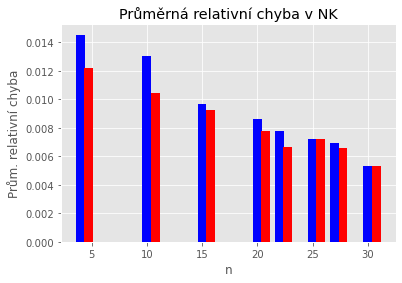

In [9]:
# graf pro porovnani prumerne relativni chyby mezi greedy a greedyRedux
plt.bar(df_gr_fin['n'], df_gr_fin['Avg_Err'], align='center', color='b')
plt.bar(df_grx_fin['n']+0.75, df_grx_fin['Avg_Err'], align='center', color='r')
plt.title('Průměrná relativní chyba v ' + fn)
plt.xlabel('n')
plt.ylabel('Prům. relativní chyba')
plt.show()

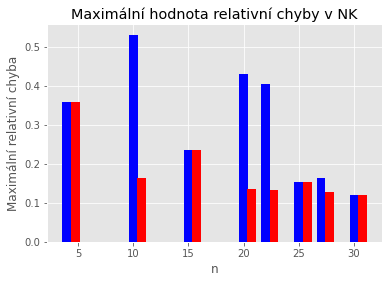

In [10]:
# graf pro porovnani maximalni relativni chyby mezi greedy a greedyRedux
plt.bar(df_gr_fin['n'], df_gr_fin['Max_Err'], align='center', color='b')
plt.bar(df_grx_fin['n']+0.75, df_grx_fin['Max_Err'], align='center', color='r')
plt.title('Maximální hodnota relativní chyby v ' + fn)
plt.xlabel('n')
plt.ylabel('Maximální relativní chyba')
plt.show()